In [1]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import griddata

import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

Matplotlib settings:

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Load the data: HA (deg), Dec (deg), dome azimuth (deg), $\Delta$HA (the maximum hour angle distance; in hours).

In [3]:
ha, dec, az, delta_ha = np.loadtxt('data/optimal_az.csv', delimiter=',', unpack=True)

ha_shifted = np.where(ha < 0, ha + 360, ha) # offset ha, s.t. ha = (0, ..., 359)

# hd = np.column_stack([ha, dec])
hd = np.column_stack([ha_shifted, dec])

Define a function using `griddata` to interpolate the optimal azimuth grid:

In [4]:
def interp_opt(ha, dec):
    val = griddata(hd, az, (ha, dec), method='nearest')
    
    return val

Calculate the appropriate $A_d$:

In [5]:
# ha_range = np.linspace(ha.min(), ha.max(), 1000)
ha_range = np.linspace(ha_shifted.min(), ha_shifted.max(), 1000)
dec_range = np.linspace(dec.min(), dec.max(), 1000)

# Define a (ha, dec) grid
ha_target, dec_target = np.meshgrid(ha_range,dec_range)

# interpolate and calc optimal az
az_target = interp_opt(ha_target, dec_target)

See below for a graph:

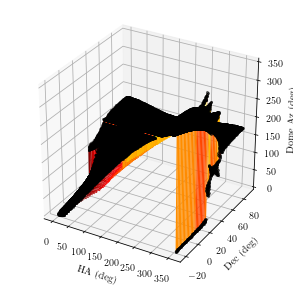

In [6]:
fig = plt.figure(figsize=(5, 5))
frame = fig.add_subplot(1, 1, 1, projection ='3d')

frame.grid(True, alpha=0.5)

frame.set_xlabel('HA (deg)')
frame.set_ylabel('Dec (deg)')
frame.set_zlabel('Dome Az (deg)')

frame.plot(ha_shifted, dec, az, color='black', ls='', alpha=0.5, marker='o', ms=2, zorder=10)
frame.plot_surface(ha_target, dec_target, az_target, rstride=20, cstride=20, cmap=cm.hot)

plt.show()